# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd

## Load the data into a DataFrame
df = pd.read_csv("../assets/Iowa_Liquor_sales_sample_10pct.csv")
## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head()
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [2]:
df.describe()
df.count()
df

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


From the count above, we see than the numbers of observations in columns are not equal (thie means that there are some missing entries in this data frame). Because, this is a pretty large dataset, I can drop rows with missing variables without greatly affecting the data. Before exploring the data, I create a new table with the columns that I will need for statistical analysis.

In [3]:
#First, I drop the rows with the missing entries, and then the "Category" and the "Item number" columns
df2 = df.dropna()
df2.drop(["Category", "Item Number", "County Number", "Vendor Number", "Volume Sold (Gallons)"], axis=1, inplace=True)
df2.count()

/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Date                    269258
Store Number            269258
City                    269258
Zip Code                269258
County                  269258
Category Name           269258
Item Description        269258
Bottle Volume (ml)      269258
State Bottle Cost       269258
State Bottle Retail     269258
Bottles Sold            269258
Sale (Dollars)          269258
Volume Sold (Liters)    269258
dtype: int64

In [4]:
#Then I change the Cost, Retail and Sale values from an opject datatype to a float datatype

def getType(field):
    return field.replace("$", "")

df2["Sale (Dollars)"] = df2["Sale (Dollars)"].apply(getType).astype(float)
df2["State Bottle Cost"] = df2["State Bottle Cost"].apply(getType).astype(float)
df2["State Bottle Retail"] = df2["State Bottle Retail"].apply(getType).astype(float)
df2.head(5)


/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,Bremer,APRICOT BRANDIES,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0
1,2016-03-02,2614,DAVENPORT,52807,Scott,BLENDED WHISKIES,Tin Cup,750,13.75,20.63,2,41.26,1.5
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,STRAIGHT BOURBON WHISKIES,Jim Beam,1000,12.59,18.89,24,453.36,24.0
3,2016-02-03,2501,AMES,50010,Story,AMERICAN COCKTAILS,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5
4,2015-08-18,3654,BELMOND,50421,Wright,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0


In [5]:
#Now, I want to add a columns for total cost and total profit, in dollars.

#df2["Total Cost (Dollars)"] = df2["State Bottle Cost"] * df2["Bottles Sold"]
#df2["Total Profit (Dollars)"] = df2["Sale (Dollars)"] - df2["Total Cost (Dollars)"]
#df2["Average Price per Bottle"] = df2["Sale (Dollars)"] / df2["Bottles Sold"]
#df2.head(5)

In [6]:
#I also want to create a two new columns that hold the month and year of transaction for each row
monthList = []
yearList = []
for i in df2["Date"]:
    x = i.to_datetime()
    y = i.month
    z = i.year
    monthList.append(y)
    yearList.append(z)
df2["Month"] = monthList
df2["Year"] = yearList

/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#Lets look at the dataframe to make sure it looks exactly how we want it to:
df2["Total Cost (Dollars)"] = df2["State Bottle Cost"] * df2["Bottles Sold"]
df2["Total Profit (Dollars)"] = df2["Sale (Dollars)"] - df2["Total Cost (Dollars)"]
df2

/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year,Total Cost (Dollars),Total Profit (Dollars)
0,2015-11-04,3717,SUMNER,50674,Bremer,APRICOT BRANDIES,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,11,2015,54.00,27.00
1,2016-03-02,2614,DAVENPORT,52807,Scott,BLENDED WHISKIES,Tin Cup,750,13.75,20.63,2,41.26,1.50,3,2016,27.50,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,STRAIGHT BOURBON WHISKIES,Jim Beam,1000,12.59,18.89,24,453.36,24.00,2,2016,302.16,151.20
3,2016-02-03,2501,AMES,50010,Story,AMERICAN COCKTAILS,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2,2016,57.00,28.50
4,2015-08-18,3654,BELMOND,50421,Wright,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,8,2015,86.40,43.20
5,2015-04-20,2569,CEDAR RAPIDS,52402,Linn,AMERICAN DRY GINS,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,4,2015,79.92,39.96
6,2015-08-05,2596,OTTUMWA,52501,Wapello,AMERICAN GRAPE BRANDIES,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,8,2015,19.98,9.99
7,2015-06-25,3456,CLEAR LAKE,50428,Cerro Gordo,CANADIAN WHISKIES,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,6,2015,31.50,15.76
8,2016-01-04,4757,BONDURANT,50035,Polk,IMPORTED VODKA,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,1,2016,45.96,23.00
9,2015-11-10,4346,SHELLSBURG,52332,Benton,CINNAMON SCHNAPPS,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,11,2015,15.24,7.62


In [8]:
groupedDf2 = df2.groupby(["County"], as_index = False).sum()
#, "Store Number", "Year", "Month")
groupedDf2
df3 = pd.DataFrame(groupedDf2)
df3.drop(["Month", "Year", "Store Number"], axis=1, inplace=True)
df3
#df3["Average Price per Bottle"] = df3["Sale (Dollars)"] / df3["Bottles Sold"]


,County,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Total Cost (Dollars),Total Profit (Dollars)
0,Adair,592500,5438.68,8167.77,4650,5.554420e+04,4359.84,36981.30,18562.90
1,Adams,238100,2377.94,3569.26,955,1.244171e+04,981.38,8290.72,4150.99
2,Allamakee,1103075,10411.70,15633.75,7450,9.900000e+04,7868.04,65848.75,33151.25
3,Appanoose,1012475,9903.40,14873.31,8171,9.842987e+04,8038.16,65536.28,32893.59
4,Audubon,232950,1982.02,2977.61,1694,1.965554e+04,1717.80,13063.78,6591.76
5,Benton,1008025,9140.10,13723.80,6449,8.003512e+04,6766.77,53309.45,26725.67
6,Black Hawk,12875925,140519.84,211004.85,172713,1.928017e+06,131951.74,1283822.59,644194.12
7,Boone,2015175,19480.05,29258.15,17233,2.230642e+05,17533.54,148220.42,74843.82
8,Bremer,2251125,22091.72,33182.25,15186,2.046495e+05,16009.78,136222.47,68427.07
9,Buchanan,1539300,15406.56,23132.47,12876,1.663298e+05,12949.08,110561.07,55768.69


In [9]:
#groupedDf3 = df2.groupby(["County", "Store Number"], as_index = False).sum()
#df4 = pd.DataFrame(groupedDf3)
#df4.drop(["Month", "Year"], axis=1, inplace=True)
#df4.head()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
data2.columns = ["County", "RSquared", "TotalSales", "VolumeSold"] 

In [ ]:
rS = data2["RSquared"]
for i in rS:
    if i >=0.95:
        lm = smf.ols(formula="TotalSales ~ VolumeSold", data=data2).fit()
        lm.summary()



In [ ]:
totalSales2 = []
bottleRetail = []
scoreList = []
bottleCost = []
volumeSold = []

for c in newCounty:
    #print c
    mask = df2["County"] == c
    #newCounty.append(c)
    X = df2[mask][["Volume Sold (Liters)"]]
    y = df2[mask][["Sale (Dollars)"]]
    model = lm.fit(X,y)
    scoreList.append(lm.score(X,y))
    totalSales2.append(sum(df2[mask]["Sale (Dollars)"]))
    #bottleRetail.append(sum(df2[mask]["State Bottle Retail"]))
    #bottleCost.append(sum(df2[mask]["State Bottle Cost"]))
    volumeSold.append(sum(df2[mask]["Volume Sold (Liters)"]))
data2 = pd.DataFrame({"Rsquared": scoreList, "County": newCounty, "Total Sales": totalSales2,
                      "Volume Sold": volumeSold})
data2

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#df3.to_csv("/Users/Lola/Documents/Dami_repo/Week 3/Project/assets/df3.csv")



## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

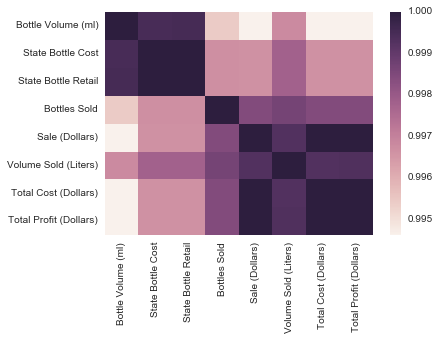

In [20]:
sns.heatmap(df3.corr())

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [17]:
from sklearn import linear_model
import statsmodels.formula.api as smf

newCounty = df3["County"]
for i in newCounty:
    X = df2[mask]["Sale (Dollars)"]
    y = df2[mask]["Total Profit (Dollars)"]

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.